In [2]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

In [2]:
from sklearn.ensemble import RandomForestClassifier
x,y = make_moons(n_samples=100, noise=.25, random_state=4)
x_train, x_test = train_test_split(x, random_state=42, stratify=y)
y_train, y_test = train_test_split(y, random_state=42, stratify=y)

# Random Forest

In [24]:
forest = RandomForestClassifier(n_estimators=30, random_state=2).fit(x_train,y_train)
print(forest.score(x_train,y_train))
print(forest.score(x_test,y_test))

1.0
0.84


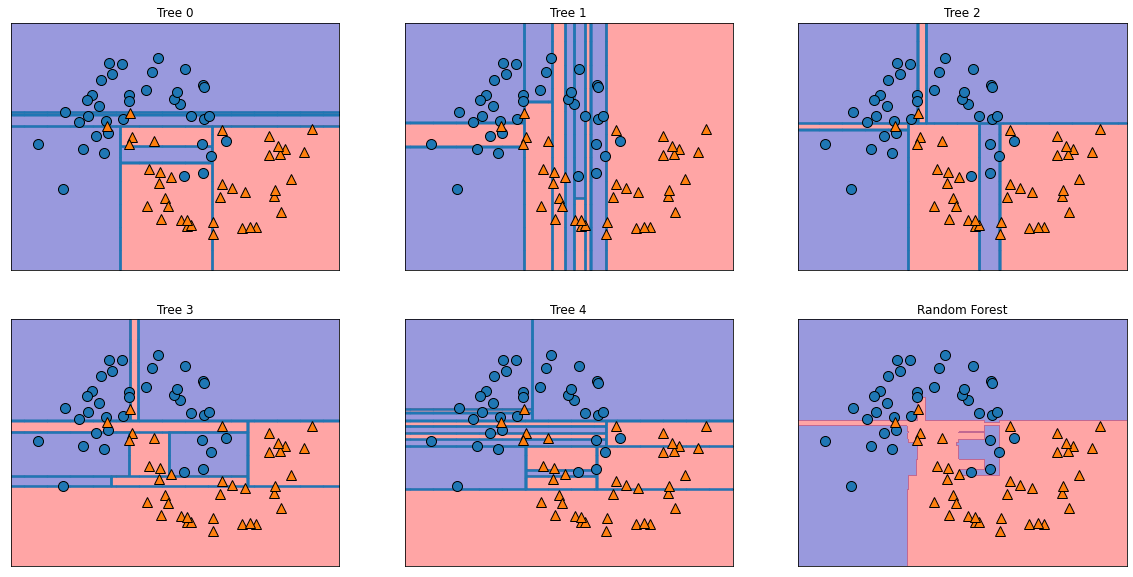

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, x_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)

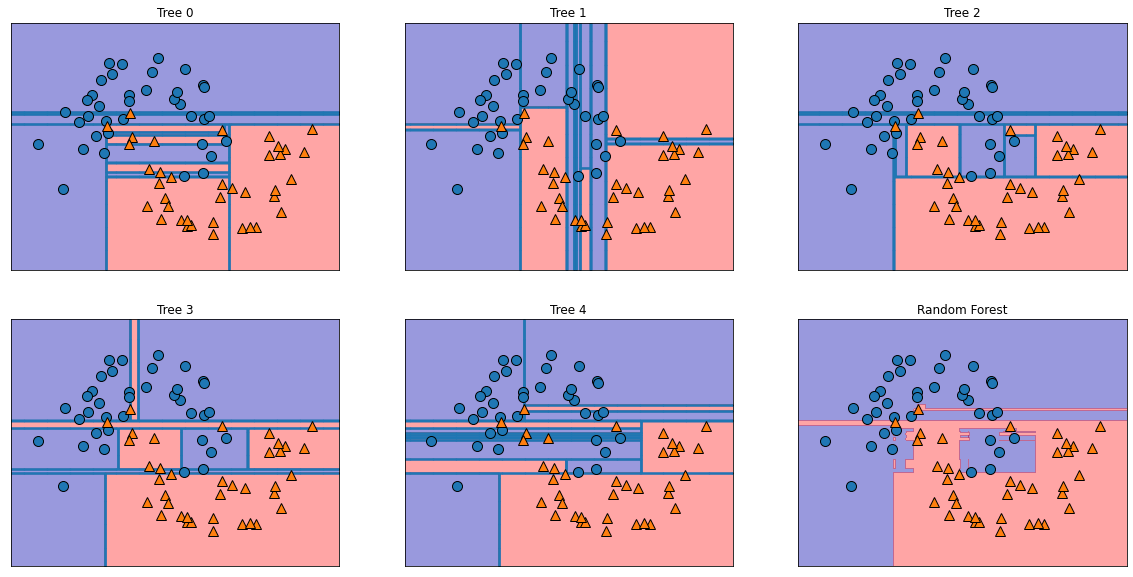

In [6]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, bootstrap=False).fit(x_train,y_train)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, x_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)

# Neural Network

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
x,y = make_moons(n_samples=100, noise=.25, random_state=4)
x_train, x_test = train_test_split(x, random_state=42, stratify=y)
y_train, y_test = train_test_split(y, random_state=42, stratify=y)

In [32]:
mlp = MLPClassifier(solver='lbfgs', activation="tanh", random_state=0, hidden_layer_sizes=(10,10), alpha=1, max_iter=10000).fit(x_train, y_train)
print(mlp.score(x_train,y_train))
print(mlp.score(x_test,y_test))

0.8666666666666667
0.88


Text(0, 0.5, 'Feature 1')

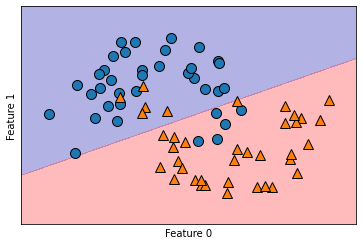

In [33]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# DBSCAN

Text(0, 0.5, 'Feature 1')

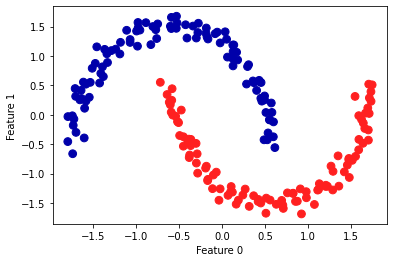

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

dbscan = DBSCAN(eps=0.6)
clusters = dbscan.fit_predict(x_scaled)
# plot the cluster assignments
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# ARI scoring with ground truth

In [13]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for algo in algorithms:
    clusters = algo.fit_predict(x_scaled)
    print(adjusted_rand_score(y, clusters))

0.5015957062647948
0.6065184066117172
1.0


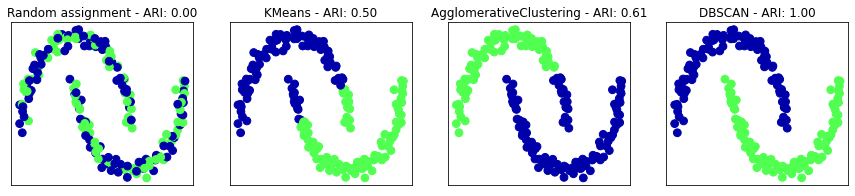

In [16]:
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

axes[0].scatter(x_scaled[:, 0], x_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))
for ax, algo in zip(axes[1:], algorithms):
# plot the cluster assignments and cluster centers
    clusters = algo.fit_predict(x_scaled)
    ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algo.__class__.__name__,adjusted_rand_score(y, clusters)))

# silhouette scoring without ground truth

In [20]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for algo in algorithms:
    clusters = algo.fit_predict(x_scaled)
    print(silhouette_score(x_scaled, clusters))

0.49304627727701233
0.4572323945292666
0.382386022679393


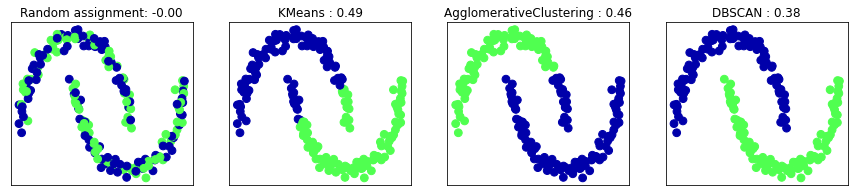

In [19]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
# plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,silhouette_score(X_scaled, clusters)))